In [44]:
import pandas as pd
import nltk

from nltk.tokenize import TreebankWordTokenizer

In [45]:
csv_file = r'C:\Users\groov\PythonCode\output\trump_tweets\trump_tweets.csv'
csv_file

'C:\\Users\\groov\\PythonCode\\output\\trump_tweets\\trump_tweets.csv'

In [46]:
df = pd.read_csv(csv_file, names=['date_posted', 'tweet'])
#df.set_index('date_posted', inplace=True)
df.tail()

,date_posted,tweet
71,2019-10-13 22:16:39+00:00,".....BY THE WAY, DON’T CALL ME AGAIN, I’LL CAL..."
72,2019-10-13 23:09:01+00:00,.@marklevinshow on @FoxNews is doing a big sho...
73,2019-10-13 23:27:49+00:00,The U.S. has the worst of the ISIS prisoners. ...
74,2019-10-14 00:10:14+00:00,Somebody please explain to Chris Wallace of Fo...
75,2019-10-14 00:34:01+00:00,“Serial killers get more Due Process than the ...


In [47]:
df.shape

(76, 2)

In [48]:
tokenizer = TreebankWordTokenizer()
df['tokens'] = df['tweet'].apply(tokenizer.tokenize)

df['tokens'][0:5]

0    [“, There, are, no, felonies, ,, there, are, n...
1    [So, many, people, conveniently, forget, that,...
2    [..., ..good, health, ,, at, my, request, ,, P...
3    [We, may, be, in, the, process, of, leaving, S...
4    [..., .understands, that, while, we, only, had...
Name: tokens, dtype: object

In [49]:
from nltk.util import ngrams

list(ngrams(df['tokens'][0:1], 2))

[]

In [56]:
list(ngrams(df['tokens'][0], 3))[0:5]

[('“', 'There', 'are'),
 ('There', 'are', 'no'),
 ('are', 'no', 'felonies'),
 ('no', 'felonies', ','),
 ('felonies', ',', 'there')]

In [66]:
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words_sklearn

stop_words_nltk = nltk.corpus.stopwords.words('english')
print(stop_words_nltk[0:5])
print(list(stop_words_sklearn)[0:5])

['i', 'me', 'my', 'myself', 'we']
['onto', 'there', 'so', 'us', 'and']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
stop_words = []

stop_words = stop_words + stop_words_nltk
stop_words = stop_words + list(stop_words_sklearn)
stop_words = list(set(stop_words))

stop_words_mine = ['“', '”', ',', '@', '’', '!']
stop_words = stop_words + stop_words_mine


len(stop_words), len(stop_words_nltk), len(list(stop_words_sklearn))

(384, 179, 318)

In [106]:
tokens = [token for token in df['tokens'][0] if token not in stop_words]
" ".join(tokens)

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [ ]:
# stemming removes the small meaning differences of pluralization or posssessive endings of words to normalize vocabulary
# it can reduce the precision score of your search results, but would improve the recall score for returning relevant docs
# so it is often useful to be able to turn off stemming where you want precision

# two of the most popular stemmers are Porter and Snowball. They were both created by the scientist Martin Porter.

In [107]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann A scam'

In [111]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann a scam'

In [112]:
# lemmatization can associate words together by their meaning even if their spelling is different
# like stemming, this can make your model less precise but more general
# it is potentially more accurate than stemming because it takes into account word meaning
# some lemmatizers use the word's part of speech in addition to spelling to improve accuracy
# so, lemmatizers are better than stemmers for most applications.

# and if you really want the dimension reduction and recall improvement of a stemmer in your information 
# retrieval pipeline, you shoudl probably also use a lemmatizer right befor the stemmer.
# because the lemma of a word is a valid English word, stemmers work well on the output of a lemmatizer

In [117]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

" ".join(lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'There felony Impeachable offenses. The Constitution clear need bribery treason high crime misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [118]:
" ".join(tokens) # slight difference

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [119]:
# when should you use a lemmatizer or a stemmer?
# stemmers are generally faster to compute and require less-complex code and datasets. but stemmers make more errors
# and stem a far greater number of words, reducing the meaning of your text much more than a lemmatizer will.

# both stemmers will reduce the vocabulary of your text and increase the ambiguity of the text. but lemmatizers do
# a better job at retaining information content of a word. so some packages such as spaCy do not provide stemming functions.

In [120]:
# VADER was one of the first rule-based sentiment analysis algorithms. 
# it stands for Valence Aware Dictionary for sEntiment Reasoning.
# nltk has an implementation of the VADER algorithm

In [127]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sa = vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...


In [134]:
tweet = df['tweet'][0]
tweet

'“There are no felonies, there are no Impeachable offenses. The Constitution’s very clear that you need bribery, treason, or other high crimes and misdemeanors. You can’t be impeached for the conduct that’s been alleged in this case.” @AlanDersh Dershowitz. @seanhannity  A Scam!'

In [139]:
sa.polarity_scores(tweet)['compound']

-0.3612

In [145]:
neg = []
neu = []
pos = []
compound = []

for tweet in df['tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()
    
    neg.append(sa.polarity_scores(tweet)['neg'])
    neu.append(sa.polarity_scores(tweet)['neu'])
    pos.append(sa.polarity_scores(tweet)['pos'])
    compound.append(sa.polarity_scores(tweet)['compound'])

“There are no felonies, there are no Impeachable offenses. The Constitution’s very clear that you need bribery, treason, or other high crimes and misdemeanors. You can’t be impeached for the conduct that’s been alleged in this case.” @AlanDersh Dershowitz. @seanhannity  A Scam!
{'neg': 0.319, 'neu': 0.627, 'pos': 0.053, 'compound': -0.9246}

So many people conveniently forget that Turkey is a big trading partner of the United States, in fact they make the structural steel frame for our F-35 Fighter Jet. They have also been good to deal with, helping me to save many lives at Idlib Province, and returning, in very.....
{'neg': 0.033, 'neu': 0.747, 'pos': 0.22, 'compound': 0.8689}

.....good health, at my request, Pastor Brunson, who had many years of a long prison term remaining. Also remember, and importantly, that Turkey is an important member in good standing of NATO. He is coming to the U.S. as my guest on November 13th. #ENDENDLESSWARS
{'neg': 0.066, 'neu': 0.795, 'pos': 0.139, 'com

....the area and start a new war all over again. Turkey is a member of NATO. Others say STAY OUT, let the Kurds fight their own battles (even with our financial help). I say hit Turkey very hard financially &amp; with sanctions if they don’t play by the rules! I am watching closely.
{'neg': 0.193, 'neu': 0.765, 'pos': 0.042, 'compound': -0.8264}

Thank you to @OANN One America News for your fair coverage and brilliant reporting. It is appreciated by many people trying so hard to find a new, consistent and powerful VOICE! See you tonight at the Big Rally in Minneapolis.
{'neg': 0.037, 'neu': 0.662, 'pos': 0.301, 'compound': 0.9205}

The President of the Ukraine just stated again, in the strongest of language, that President Trump applied no pressure and did absolutely nothing wrong. He used the strongest language possible. That should end this Democrat Scam, but it won’t, because the Dems &amp; Media are FIXED!
{'neg': 0.107, 'neu': 0.774, 'pos': 0.118, 'compound': 0.1426}

Why isn’t th

In [162]:
sa_df = pd.DataFrame({'neg': neg, 'neu': neu, 'pos': pos, 'compound': compound, 'tweet': df['tweet']})
sa_df.head()

,neg,neu,pos,compound,tweet
0,0.319,0.627,0.053,-0.9246,"“There are no felonies, there are no Impeachab..."
1,0.033,0.747,0.220,0.8689,So many people conveniently forget that Turkey...
2,0.066,0.795,0.139,0.4019,".....good health, at my request, Pastor Brunso..."
3,0.133,0.656,0.211,0.7776,"We may be in the process of leaving Syria, but..."
4,0.141,0.815,0.044,-0.7088,....understands that while we only had 50 sold...


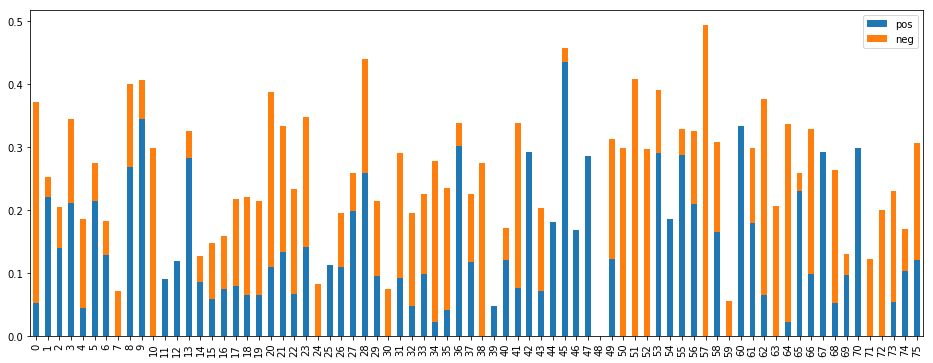

In [163]:
import matplotlib.pyplot
%matplotlib inline

sa_df[['pos', 'neg']].plot.bar(stacked=True, figsize=(16,6))

In [164]:
sa_df.describe()

,neg,neu,pos,compound
count,76.000000,76.000000,76.000000,76.000000
mean,0.127276,0.749276,0.123408,-0.002125
std,0.108440,0.103555,0.104909,0.703299
min,0.000000,0.507000,0.000000,-0.955100
25%,0.042000,0.674250,0.048000,-0.656000
50%,0.117000,0.741500,0.099000,-0.113350
75%,0.194250,0.815500,0.188500,0.756900
max,0.493000,1.000000,0.435000,0.982800


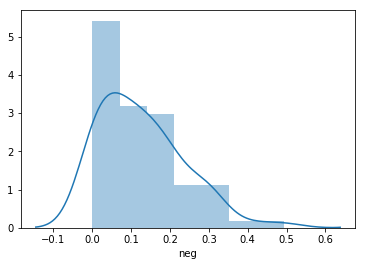

In [165]:
import seaborn as sns

sns.distplot(sa_df['neg'])

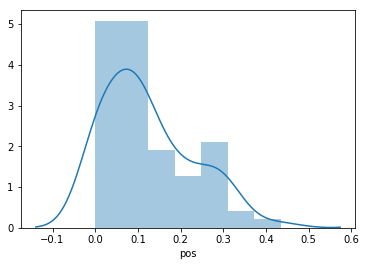

In [166]:
sns.distplot(sa_df['pos'])

In [171]:
for tweet in sa_df[sa_df['pos'] > 0.3]['tweet']:
    print(tweet)
    print()

Someone please tell the Radical Left Mayor of Minneapolis that he can’t price out Free Speech. Probably illegal! I stand strongly &amp; proudly with the great Police Officers and Law Enforcement of Minneapolis and the Great State of Minnesota! See you Thursday Night!

Thank you to @OANN One America News for your fair coverage and brilliant reporting. It is appreciated by many people trying so hard to find a new, consistent and powerful VOICE! See you tonight at the Big Rally in Minneapolis.

Will be with our two GREAT Senators, @SenJohnKennedy &amp; @SenBillCassidy, tonight in Louisiana. These two hard working, really smart men, love their Country and love their State. We will hopefully add a Great New Republican Governor to the beautiful Louisiana mix! See you tonight!

Congratulations to the Great State of Louisiana. A big night. You will soon have a new and wonderful Governor, @EddieRispone. Your Taxes and Car Insurance Payments will go DOWN!



In [172]:
for tweet in sa_df[sa_df['neg'] > 0.3]['tweet']:
    print(tweet)
    print()
    
# the war one is interesting, because that's actually a very positive message

“There are no felonies, there are no Impeachable offenses. The Constitution’s very clear that you need bribery, treason, or other high crimes and misdemeanors. You can’t be impeached for the conduct that’s been alleged in this case.” @AlanDersh Dershowitz. @seanhannity  A Scam!

“Schiff aides worked with Whistleblower.” @foxandfriends  @RepLeeZeldin  Schiff is a lying mess!

The Endless Wars Must End!

Very smart not to be involved in the intense fighting along the Turkish Border, for a change. Those that mistakenly got us into the Middle East Wars are still pushing to fight. They have no idea what a bad decision they have made. Why are they not asking for a Declaration of War?

.....The Kurds and Turkey have been fighting for many years. Turkey considers the PKK the worst terrorists of all. Others may want to come in and fight for one side or the other. Let them! We are monitoring the situation closely. Endless Wars!

